### htmファイルからCSVファイル出力する関数

In [53]:
import re
import csv

html_file_path = "StrategyTester_1.htm"
# 出力先CSVファイルを指定
csv_file_path = "output1.csv"

# CSVファイルを開く
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    headers = ['#', '時間', '取引種別', '注文番号', '数量', '価格', '決済逆指値(S/L)', '決済指値(T/P)', '損益', '残高']
    csv_writer.writerow(headers)

    with open(html_file_path) as f:
        lines = f.readlines()

    for line in lines:
        line = line.strip()
        if '<tr align=right><td>' in line or '<tr bgcolor="#E0E0E0" align=right>' in line:
            # <td>タグ内の文字列を全て抜き出す
            matches = re.findall(r'<td.*?>(.*?)<\/td>', line)
            # 空の要素（colspan=2の箇所）を除いてCSVに書き込み
            matches = [match for match in matches if match]
            csv_writer.writerow(matches)


### CSVファイルから残高推移を可視化する処理

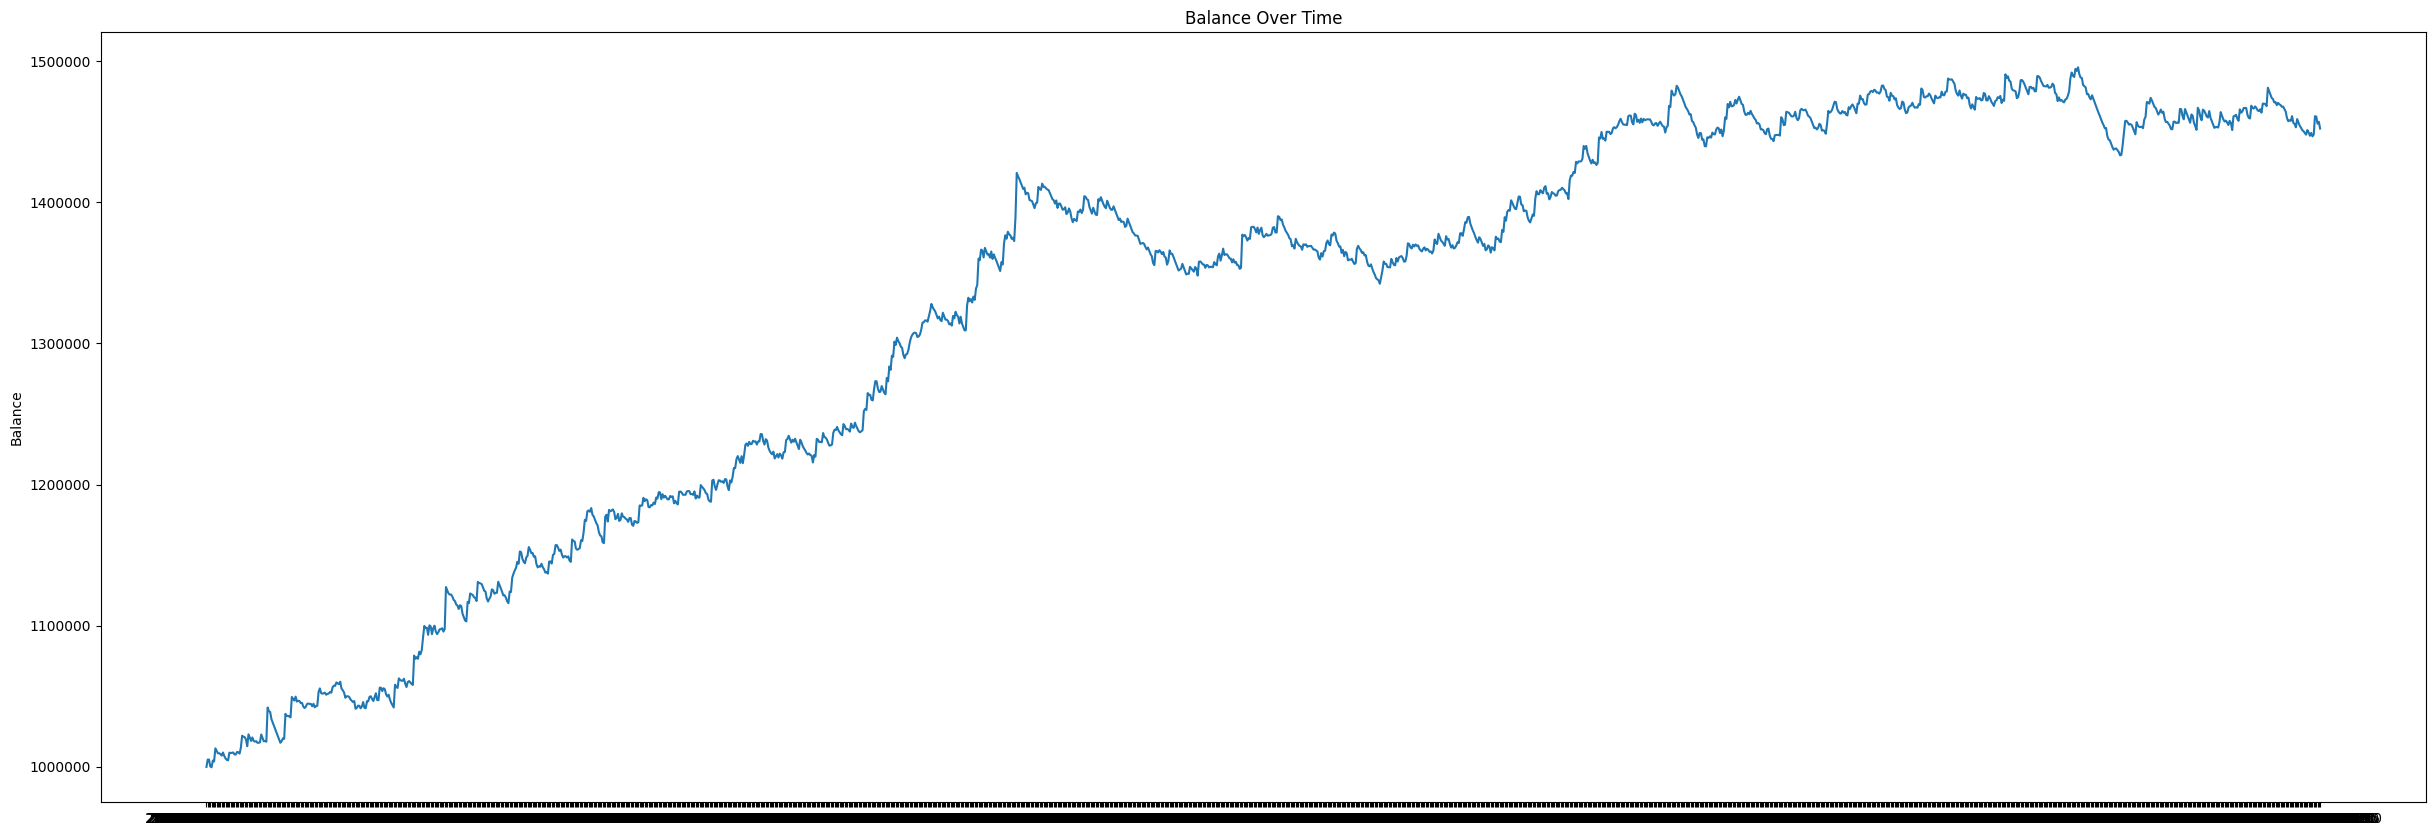

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む
df = pd.read_csv('output1.csv')

# '残高'列が空でない行のみを抽出する
df = df[df['残高'].notna()]

# 新しい図の大きさを指定する
plt.figure(figsize=(30, 10))

# '#'列に対する'残高'のデータをプロットする
#plt.plot(df['#'], df['残高'])
plt.plot(df['時間'], df['残高'])

# 軸のラベルの書式を変更する
plt.ticklabel_format(style='plain', axis='y', useOffset=False)

# グラフのタイトルと軸ラベルを設定する
plt.title('Balance Over Time')
plt.ylabel('Balance')

# グラフを表示する
plt.show()


### 異なるテスター結果を可視化する処理

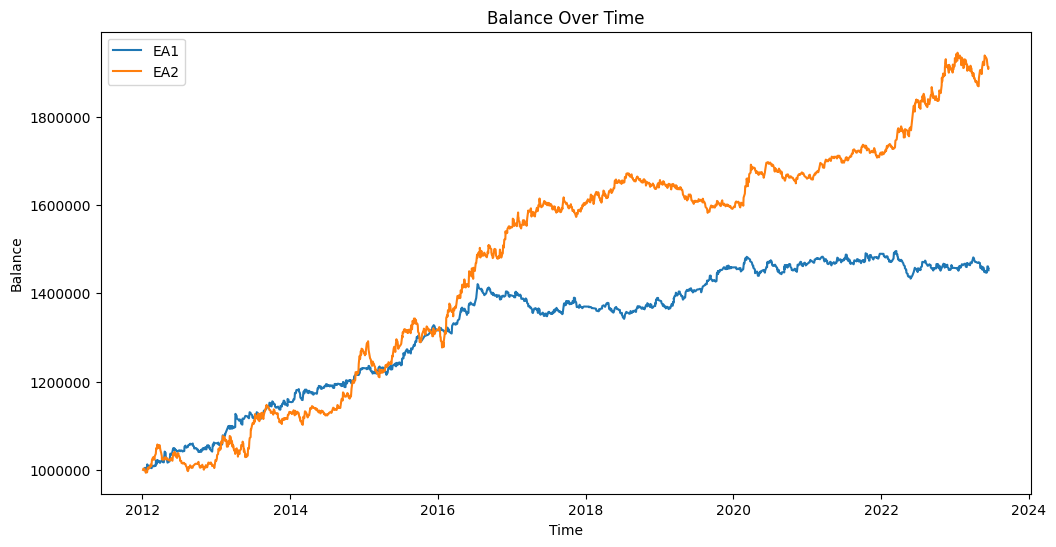

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# EA1とEA2のバックテスト結果を読み込む
df1 = pd.read_csv('output1.csv')
df2 = pd.read_csv('output2.csv')

# 時間列をdatetime型に変換
df1['時間'] = pd.to_datetime(df1['時間'])
df2['時間'] = pd.to_datetime(df2['時間'])

# '残高'列が空でない行のみを抽出する
df1 = df1[df1['残高'].notna()]
df2 = df2[df2['残高'].notna()]

# 新しい図の大きさを指定する
plt.figure(figsize=(12, 6))

# '時間'列に対する'残高'のデータをプロットする
plt.plot(df1['時間'], df1['残高'], label='EA1')
plt.plot(df2['時間'], df2['残高'], label='EA2')

# グラフのタイトルと軸ラベルを設定する
plt.title('Balance Over Time')
plt.xlabel('Time')
plt.ylabel('Balance')

# 軸のラベルの書式を変更する
formatter = FuncFormatter(lambda x, pos: '{:.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# 凡例を表示する
plt.legend()

# グラフを表示する
plt.show()
